## 1. Web Scraping

Modify the scripts we used in class to make a program to download both tables present in the  wikipedia page on the Anscombe's Quartet (https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Each table should be saved in its own csv file. **Note:** Your file for the first table should contain the column names, the file for the second table does not need the column names.

In [10]:
import requests
import pandas as pd
page  = requests.get('https://en.wikipedia.org/wiki/Anscombe%27s_quartet')
print(page)

<Response [200]>


In [22]:
data = page.text

from bs4 import BeautifulSoup
soup = BeautifulSoup(data,'html5lib')

table = soup.find_all('table')[0]
df = pd.read_html(str(table))[0]

df


,Property,Value,Accuracy
0,Mean of x,9,exact
1,Sample variance of x : s2 x,11,exact
2,Mean of y,7.50,to 2 decimal places
3,Sample variance of y : s2 y,4.125,±0.003
4,Correlation between x and y,0.816,to 3 decimal places
5,Linear regression line,y = 3.00 + 0.500x,"to 2 and 3 decimal places, respectively"
6,Coefficient of determination of the linear reg...,0.67,to 2 decimal places


In [24]:
df.to_csv('data.csv')

In [12]:
for table in soup.find_all("table"):
    if table.find('caption'):
        fullTable = []
        for tr in table.find_all('tr'):
            line = []
            if tr.find_all('th'):
                columnNames = []
                for th in tr.find_all('th'):
                    columnNames.append(th.get_text().strip())
            else:
                for td in tr.find_all('td'):
                    line.append(td.get_text().strip())
                fullTable.append(line)

if len(columnNames) == len(fullTable[1]):
    newTable = pd.DataFrame(fullTable, columns = columnNames)
else:
    newTable = pd.DataFrame(fullTable)
newTable

,0,1,2,3,4,5,6,7
0,x,y,x,y,x,y,x,y
1,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
2,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
3,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
4,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
5,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
6,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
7,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
8,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
9,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56


In [13]:
newTable.to_csv('anscombe.csv')

## 2. Pandas and Stats

The Iris dataset is one of the most famous datasets in statistics. Read about it in wikipedia: https://en.wikipedia.org/wiki/Iris_flower_data_set.

Download the dataset from the table in the wikipedia page using beatifulsoup or pandas, create a pandas dataframe containing the dataset (including column names). **Note:** The first column of the table contains only the order of the points in the dataset, it should become the index of your data frame.

In [30]:
import pandas as pd
table = pd.read_html("https://en.wikipedia.org/wiki/Iris_flower_data_set", header=0, index_col=0)
iris = table[0]


Your dataframe might have string values in the columns, if so, you need to convert each of the columns that should contain numbers to numeric values (Check the function `pd.to_numeric`).

After converting the columns to numeric use the `desribe()` method to  calculate the average and standard deviation for each variable.

In [33]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  150 non-null    float64
 1   Sepal width   150 non-null    float64
 2   Petal length  150 non-null    float64
 3   Petal width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [34]:
iris.describe()

,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.200000
std,0.828066,0.435866,1.765298,0.761401
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Use the `.groupby()` method to group the data by species and calculate the average and standard deviation for each variable based on the iris species.

In [41]:
iris.groupby("Species").mean()

,Sepal length,Sepal width,Petal length,Petal width
Species,,,,
I. setosa,5.006,3.428,1.462,0.248
I. versicolor,5.936,2.770,4.260,1.326
I. virginica,6.588,2.974,5.552,2.026


In [42]:
iris.groupby("Species").std()

,Sepal length,Sepal width,Petal length,Petal width
Species,,,,
I. setosa,0.352490,0.379064,0.173664,0.105444
I. versicolor,0.516171,0.313798,0.469911,0.197753
I. virginica,0.635880,0.322497,0.551895,0.274650


Make scatter plot showing the covariance of the variables. Check plotly's `create_scatterplotmatrix` function from the `figure_factory`. Your graph should look like this:

<img src="iris.png"></img>

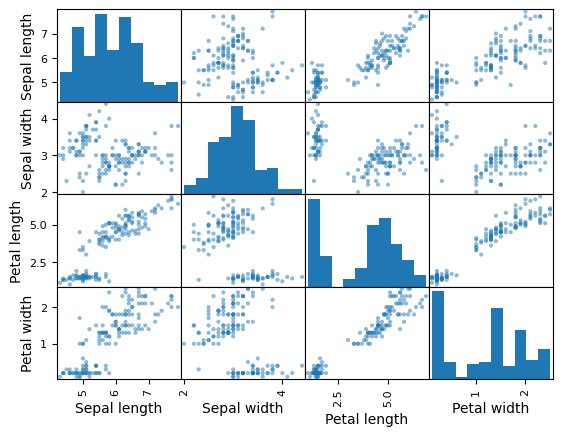

In [44]:
from matplotlib import pyplot as plt
import plotly.graph_objs as go
import plotly.express as px

from pandas.plotting import scatter_matrix
scatter_matrix(iris)
plt.show()